# **TP FINAL ALGORITMOS**

HEURISTICA SECUENCIA MAS PARECIDA






*Integrantes: Javier Russo*

# OBJETIVOS

1. Proponer un algoritmo goloso para el problema del texto más parecido.
2. Aleatorizar el algoritmo anterior.
3. Proponer un algoritmo de búsqueda local para el problema del texto más parecido.
4. Variar parámetros y la estrategia del algoritmo de búsqueda local que optimicen el funcionamiento del mismo.
5. Construir un algoritmo GRASP para el problema del texto más parecido. La entrada de su algoritmo será un archivo con una instancia del problema del texto más parecido (un texto por línea) y la salida deberá ser un archivo de texto plano con una secuencia en la primera línea y su distancia máxima en la siguiente
6. Presentar un gráfico de scoring contra la cantidad de iteraciones para baterías de distintas instancias, que permita decidir una cantidad de  teraciones que ayude a encontrar un valor cercano al óptimo sin desperdiciar
tiempo de cómputo.

# IMPORTACIONES

In [384]:
#Manipulacion de datos
import pandas as pd
import numpy as np
import random as rd

#Graficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# PRECONDICIONES

Para la investigación se van a tener en cuenta las siguientes precondiciones:
* La cantidad de caracteres de todas las secuencias deben ser iguales

# GLOSARIO

* n: Cantidad de secuencias que contiene la lista de secuencias.
* m: Cantidad de caracteres que contiene cada secuencia.
* c: Cantidad de caracteres que contiene cierta posición m, sobre el total de secuencias.
* FR: Frecuencia relativa
* O(x): Orden de compljidad en función de la variable x

# FUNCIONES

A continuación se estudiarán las distintas funciones principales para llegar al algoritmo GRASP


*NOTA: Algunos algoritmos tienen funcionalidades adiciones solamente son fin de pruebas para investigación. Al final de cada analisis se describirá el algoritmo final.*

## ALGORITMO GREEDY CON ALEATORIZACIÓN DE ELEMENTOS

### SOLUCIÓN INICIAL

* Nombre: **solución_greedy**
* Acción: Construye una cadena de n caracteres aleatorios utilizando como referencia, la frecuencia relativa de caracteres de cada posición m, de una lista de secuencias de caracteres.
* Input:
  * secuencias: una lista de n secuencias con m caracteres cada uno.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * TipoFrec: (parámetro con fines de pruebas)
    1. Utiliza los caracteres mas Ferecuentes (FR >= 1/c)
    2. Utiliza los caracteres menos Frecuentres (FR < 1/c)
    3. Utiliza caracteres aleatorios entre mas y menos Frecuentes
* Salida: una secuencia de caracteres.

In [10]:
def solucion_greedy(secuencias, n, m, TipoFrec=1):# O(n*m)

  # Se inicia la variable solución con un string de 0 caracteres
  solucion = "" #O(1)

  # Obtengo la lista de frecuencias de caracteres de todas las pos
  _, max_frec, min_frec = frecuencias_relativas(secuencias, n, m) #O(m*n)

  # Para cada caracter en la cantidad total de caracteres
  for char in range(m): #O(m)

    #Dependiendo de la frecuencia a utilizar seleccionamos los caracteres
    match TipoFrec: #O(1)
      case 1: #Caracteres mas frecuentes
        lista_caracteres = max_frec[char] #O(1)
      case 2: #Caracteres menos frecuentes
        lista_caracteres = min_frec[char] #O(1)
      case 3: #Caracteres mas y menos frecuentes
        lista_caracteres = rd.choice(max_frec[char]) + elegirRand(min_frec[char],rd.choice(max_frec[char])) #O(1)

    #Selecciona un caracter aleatorio de la lista de caracteres
    caracter_seleccionado = elegirRand(lista_caracteres, rd.choice(max_frec[char])) #O(1)

    #Agrega el caracter a la solución
    solucion += caracter_seleccionado #O(1)

  return solucion

### PRUEBAS

El algoritomo *solución_greedy* es utilizado por el algoritmo *GRASP*, para explorar soluciones diferentes mediante busqueda local. Su objetivo es obtener variabilidad en las soluciones y en segundo lugar exactitud.
Teniendo en cuenta este objetivo, se plantea una prueba de comparación de distancias máximas obtenidas, entre una lista de secuencias y una solución greedy de dichas secuencias.
Estas pruebas se realizarán sobre dos set de datos: 
1. Un set de secuencias aleatorias generada mediante la función *"crear_secuencias_aleatorias"*.
2. Un set de cadenas aleatorios provista en clase.

Sobre cada set de datos se evaluará el efecto de las siguientes variaciones:

1. Variar la cantidad de secuencias: Set 1 -> (n = 10, 20, 40, 80, 100) | Set 2 -> (n = 10, 15, 20)
2. Variar la cantidad de caracteres: Set 1 -> (m = 200, 400, 600, 800, 1000) | Set 2 -> (m = 300 , 500, 700 )
3. Variar la cantidad de caracteres posibles Set 1-> (caracteres_posibles = 4, 8, 12, 16, 20) 
4. Variar la frecuencia de los caracteres a elegir (mas frecuentes, menos frecuentes, mas y menos frecuentes)

*Nota: Si bien n y m no varían de la misma forma entre los set, los valores del set 2 estan incluidos en el rango de valores del set 1. En el caso de (3), el set provisto solo contiene 4 caracteres posibles, por lo que dicha evaluación no será realizada sobre ese set.*

Para cada caso se evaluará la capacidad de generar soluciones variables y lo mas exactas posibles.

Para la variabilidad se utilizará el desvío estándar de las distancias:
- Un desvío estándar más pequeño indica que los datos están más cerca de la media, lo que significa menos variabilidad.
- Un desvío estándar más grande indica que los datos están más dispersos alrededor de la media, lo que significa más variabilidad.

Para exactitud se utilizará la distancia maxima:
- Una distancia máxima mas pequeña indica que la secuencia de caracteres es mas parecida a las demas secuencias.
- Una distancia máxima mas grande indica que la secuencia de caracteres es menos parecida a las demas secuencias.


#### Creación SET 1

In [29]:
set1 = pd.DataFrame({'n':[], 'm':[],'c':[],'tipoFrec':[],'maxDist':[]})
caracteres="abcdefghijklmnopqrstuvwxyz"

# Por cada una de las variables a controlar 
for n in [10, 20, 40, 80, 100]:
  for m in [200, 400, 600, 800, 1000]:
    for c in [4, 8, 12, 16, 20]:
      for tipoFrec in [1, 2, 3]:

        # Creo 3 listas de secuencias independientes
        for i in range(3): #O(n*m+s2(n*m))
          secuencias = crear_secuencias_aleatorias(n, m, caracteres[:c]) #O(n*m)

          # Calculo 30 soluciones greedy para cada lista de secuencias y guardo sus distancias
          for s in range(30): #O(2*n*m)
              sc = solucion_greedy(secuencias, n, m, tipoFrec) #O(n*m)
              distancia = max(calcular_distancias(secuencias, sc)) #O(n*m)
              df = pd.DataFrame({
                'n':[n], 
                'm':[m],
                'c':[c], 
                'tipoFrec':[tipoFrec],
                'maxDist':[distancia]
              })
              set1 = pd.concat([set1,df], ignore_index=True)
set1.to_csv("set1.csv")

#### Creación SET 2

In [36]:
set2 = pd.DataFrame({'n':[], 'm':[],'c':[],'tipoFrec':[],'maxDist':[]})

# Por cada una de las variables a controlar 
for n in [10, 15, 20]:
  for m in [300, 500, 700]:
    for c in [4]:
      for tipoFrec in [1, 2, 3]:

        #importo los archivos
        for i in range(1,4,1): #O(n*m+s2(n*m))
          path = './instancias/texto_mas_parecido_'+str(n)+'_'+str(m)+'_'+str(i)+'.txt'
          with open(path, 'r', encoding='utf-8') as file:
            secuencias = file.readlines()
            secuencias = [secuencia.strip() for secuencia in secuencias]

          # Calculo 30 soluciones greedy y guardo sus distancias
          for s in range(30): #O(2*n*m)
              sc = solucion_greedy(secuencias, n, m, tipoFrec) #O(n*m)
              distancia = max(calcular_distancias(secuencias, sc)) #O(n*m)
              df = pd.DataFrame({
                'n':[n], 
                'm':[m],
                'c':[c], 
                'tipoFrec':[tipoFrec],
                'maxDist':[distancia]
              })
              set2 = pd.concat([set2,df], ignore_index=True)
set2.to_csv("set2.csv")

In [ ]:
#Importación de los set de datos generados
set1.to_csv("set1.csv")
set2.to_csv("set2.csv")

#### Analisis

Una vez generados / importados los set de datos, se realiza una inepeccion inicial viendo como se comporta las distancias maáximas calculadas con respecto a las variables establecidas (n,m,c,tipoFrec).
Para tal fin se realiza una grilla con graficos de caja, en donde las columnas representan la variación de m, las filas la variación de n, el eje x la variable c, el eje y las distancias máximas y en color los 3 tipos de frecuencias de caracteres seleccionados (máximo, minimo y aleatorio)

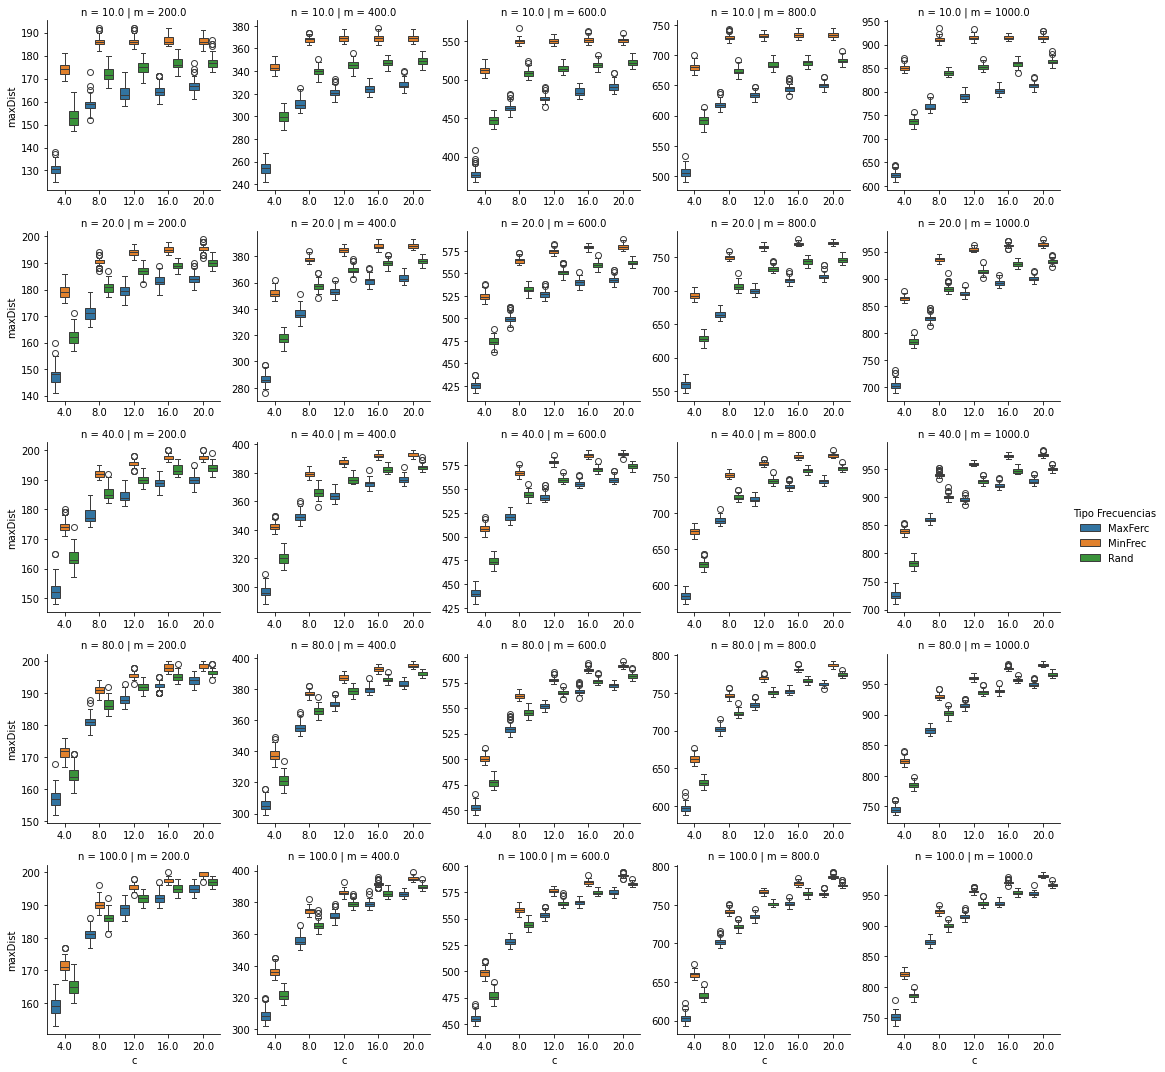

In [64]:
g = sns.FacetGrid(set1, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.boxplot, y='maxDist', x='c', hue="tipoFrec", palette="tab10")
g.add_legend(title="Tipo Frecuencias")
legend = g._legend
new_labels = ['MaxFerc', 'MinFrec', 'Rand']
for t, l in zip(legend.texts[0:], new_labels):
    t.set_text(l)

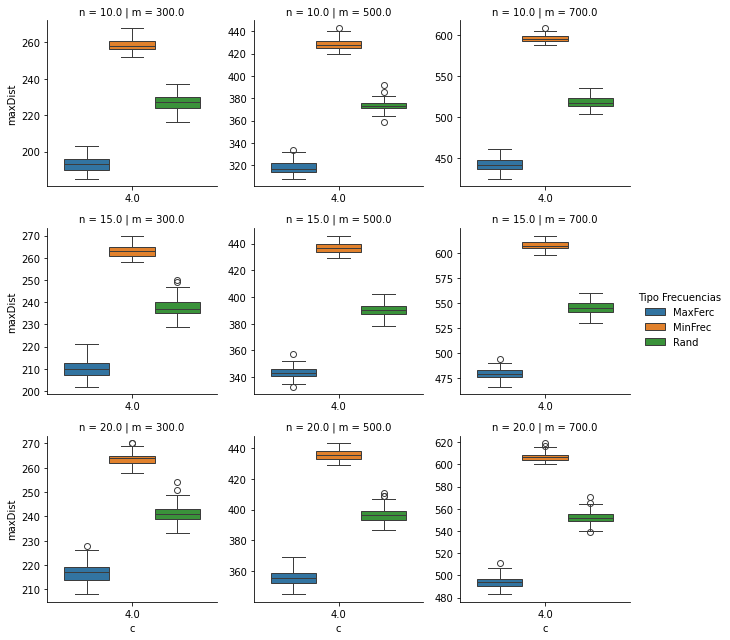

In [81]:
g = sns.FacetGrid(set2, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.boxplot, y='maxDist', x='c', hue="tipoFrec", palette="tab10")
g.add_legend(title="Tipo Frecuencias")
legend = g._legend
new_labels = ['MaxFerc', 'MinFrec', 'Rand']
for t, l in zip(legend.texts[0:], new_labels):
    t.set_text(l)

Para realizar una mejor comparación de las distancias entre las variables se normalizan las distancias relacionandolas con la distancia máxima posible que es igual al valor de la variable m.
Para cada dataset se calcula:

*maxDist% = 100-(maxDist x 100 / m)*

MaxDist% indica el % de similitud máximo de la secuencia greedy con respecto a las secuencias analizadas.
Se realizan nuevamente los gráficos con la distancia normalizada.

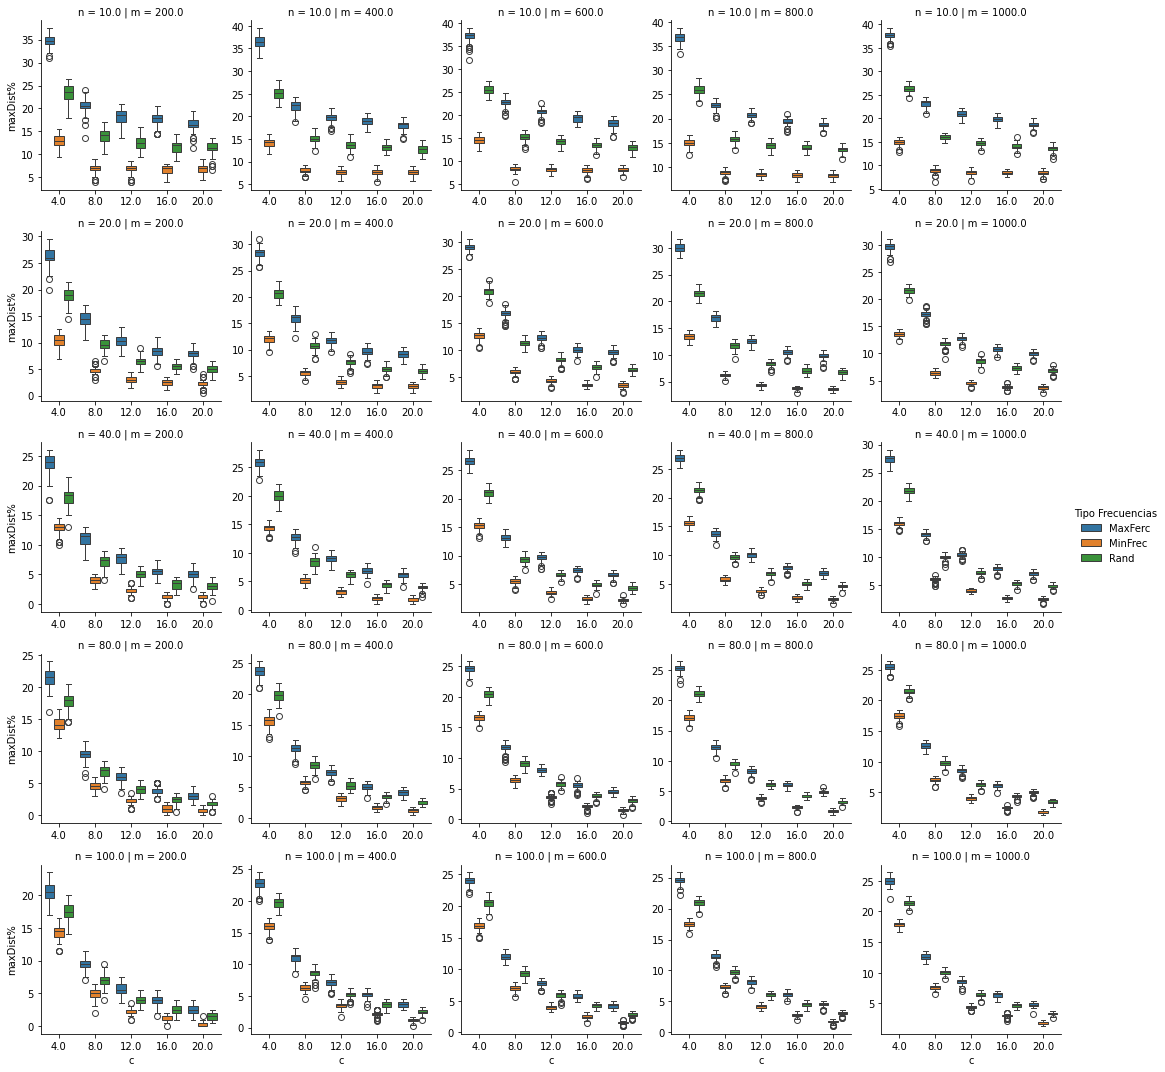

In [79]:
set1['maxDist%'] = 100-set1['maxDist']*100/set1['m']
g = sns.FacetGrid(set1, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.boxplot, y='maxDist%', x='c', hue="tipoFrec", palette="tab10")
g.add_legend(title="Tipo Frecuencias")
legend = g._legend
new_labels = ['MaxFerc', 'MinFrec', 'Rand']
for t, l in zip(legend.texts[0:], new_labels):
    t.set_text(l)

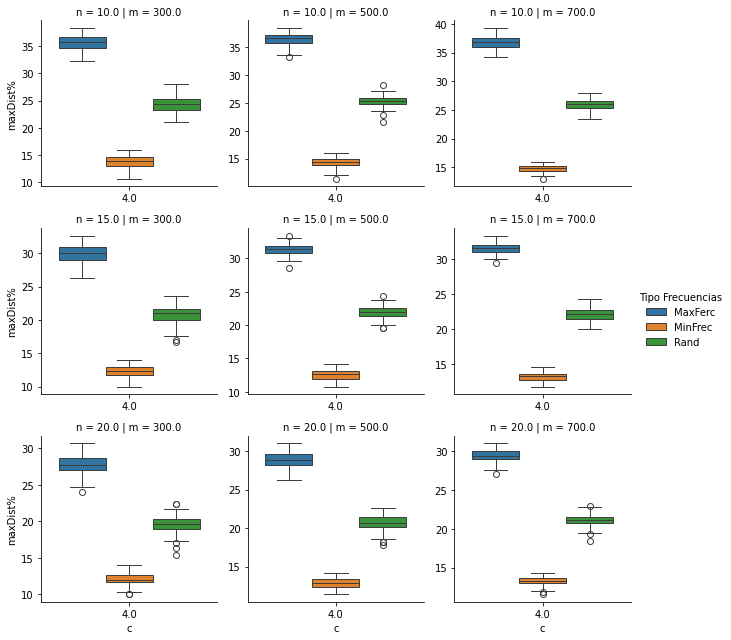

In [80]:
set2['maxDist%'] = 100-set2['maxDist']*100/set2['m']
g = sns.FacetGrid(set2, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.boxplot, y='maxDist%', x='c', hue="tipoFrec", palette="tab10")
g.add_legend(title="Tipo Frecuencias")
legend = g._legend
new_labels = ['MaxFerc', 'MinFrec', 'Rand']
for t, l in zip(legend.texts[0:], new_labels):
    t.set_text(l)

### CONCLUCIONES

Observando las distancias normalizadas, se observan varios efectos:
1. En todos los casos, las similitudes para los tipos de frecuencia selecionada en el algoritmo greedy (tipoFrec)- > MaxFrec > Rand > MinFerc.

Esto se puede explicar teniendo en cuenta que al elegir los caracteres mas frecuentes, la probabilidad de similitud es una misma posición m entre las n secuencias es mayor que al elegir otro caracter, por lo que genera una distancia de hamming menor.

2. A medida que aumenta el numero de c, maxDist% es menor.

Teniendo en cuenta que la probabilidad de aparición de un caracter es 1/c, a medida que aumenta el numero de c la probabilidad de aparición en distintas lineas disminuye. Por lo tanto el efecto es similar al elegir un caracter poco probable, como en la observación 1. Esto produce distancias de hamming menores y en consecuencia menor similitud.

3. A medida que aumenta m, los devíos tienden a ser menores. 

Al comparar los caracteres pueden ocurrir 2 cosas que sean iguales o no. Si consideramos que cada carácter tiene una probabilidad p de ser igual y 1−p de ser diferente, la distancia de Hamming entre una secuencia generada y una secuencia original sigue una distribución binomial. Para una distribución binomial Bin(m,p): 
* La media es *m x p*
* La desviación estándar es *raiz(m x p x (1−p))*

A medida que m aumenta, la desviación estándar crece en términos absolutos, pero la variabilidad relativa (desviación estándar dividida por la media) disminuye. Esto significa que la proporción de la desviación estándar respecto a la media disminuye con m.

4. A medida que aumenta n, maxMinDist% es menor. 

En este caso, al aumentar la cantidad de secuencias hace que la variabilidad en los caracteres de la posición m sea mayor, por lo que sus frecuencias relativas se igualan y a la hora de calcular las distancias de hamming hay mas probabilidad de que los caracteres no sean iguales, produciendo asi distancias mas grandes y menor similitud.

Teniendo en cuenta estas observaciones, de se descarta de los analisis siguientes los datos de rand y minFrec, ya que la tener desvíos similares a MaxFrec no aportan una variabilidad significativamente mayor y las soluciones que generan son menos exactas.

### SOLUCIÓN FINAL

* Nombre: **solución_greedy**
* Acción: Construye una cadena de n caracteres aleatorios utilizando como referencia, las mayores frecuencias relativas de caracteres de cada posición m, de una lista de secuencias de caracteres.
* Input:
  * secuencias: una lista de n secuencias con m caracteres cada uno.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
* Salida: una secuencia de caracteres.

In [11]:
def solucion_greedy(secuencias, n, m):# O(n*m)

  # Se inicia la variable solución con un string de 0 caracteres
  solucion = "" #O(1)

  # Obtengo la lista de frecuencias de caracteres de todas las pos
  _, max_frec, _ = frecuencias_relativas(secuencias, n, m) #O(m*n)

  # Para cada caracter en la cantidad total de caracteres
  for char in range(m): #O(m)

    #Selecciona un caracter aleatorio de la lista de caracteres
    caracter_seleccionado = rd.choice(max_frec[char]) #O(1)

    #Agrega el caracter a la solución
    solucion += caracter_seleccionado #O(1)

  return solucion

## ALGORITMO DE BUSQUEDA LOCAL

### SOLUCIÓN INICIAL

* Nombre: **busqueda_local**
* Acción: Encuentra una secuencia de caracteres con menor distancia de hamming que una solucion inicial (menor local).
* Input:
  * solucion: secuencia de m caracteres.
  * secuencias: una lista de n secuencias con m caracteres cada una.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * iteraciones (opcional): entero que indica la cantidad de iteraciones a realizar.
* Salida: una secuencia de caracteres.

In [165]:
def busqueda_local(solucion, secuencias, m, n, iteraciones=1000):#O(i*m*n)

    # Solución inicial 
    mejor_solucion = solucion #O(1)

    # Almacena las distancias entre la solución inicial y las secuencias
    dist = calcular_distancias(secuencias,mejor_solucion) #O(n*m)

    # Almacena la mejor distancia inicial
    mejor_distancia = max(dist) #O(n)

    # Almacena un set de caracteres en la posición m de caracteres
    caracteres_distintos = set_caracteres(n,m,secuencias) #O(n*m)

    # Inicio de iterador para el corte
    iterador = 0 

    # Mientras no se llegue a la cantidad de iteraciones sigo iterador
    while iterador<iteraciones: #O(i*m+n)

        iterador += 1 #O(1)

        vecino, pos, nuevo_caracter = generar_vecino(mejor_solucion, m, caracteres_distintos) #O(m)      
                                    
        dist = actualizar_distancias(secuencias, dist, mejor_solucion[pos], nuevo_caracter, pos) #O(n)
                    
        nueva_distancia = max(dist) #O(n)
        
        
        #Si la nueva distancia es mejor lo reemplazo, caso contrario sigo con otro caracter
        if nueva_distancia < mejor_distancia: #O(1)
            mejor_solucion = vecino           #O(1)
            mejor_distancia = nueva_distancia #O(1)
            

    return mejor_solucion, mejor_distancia

### PRUEBAS

El objetivo del algoritomo *busqueda_local* es mejorar la solución inical greedy. Esto lo logra realizando pequeñas variaciones sobre la secuencia origina (vecinos) y encontrar una solución que genera una menor distancia a la original.
Teniendo en cuenta este objetivo, se plantea una prueba de comparación de distancias máximas obtenidas, entre una lista de secuencias y una solución greedy de dichas secuencias.

Estas pruebas se realizarán sobre dos set de datos: 
1. Un set de secuencias aleatorias generada mediante la función *"crear_secuencias_aleatorias"*.
2. Un set de cadenas aleatorios provista en clase.

Sobre cada set de datos se evaluará el efecto de las siguientes variaciones:

1. Variar la cantidad de secuencias: Set 1 -> (n = 10, 20, 40, 80, 100) | Set 2 -> (n = 10, 15, 20)
2. Variar la cantidad de caracteres: Set 1 -> (m = 200, 400, 600, 800, 1000) | Set 2 -> (m = 300 , 500, 700 )
3. Variar la cantidad de caracteres posibles Set 1-> (caracteres_posibles = 4, 8, 12, 16, 20) 

*Nota: Si bien n y m no varían de la misma forma entre los set, los valores del set 2 estan incluidos en el rango de valores del set 1. En el caso de (3), el set provisto solo contiene 4 caracteres posibles, por lo que dicha evaluación no será realizada sobre ese set.*

En cada caso se evaluará la capacidad del algoritmo en generar soluciones cada vez mas similares a la lista de secuencias. Para dicho fin se realizara una evaluacion de la convergencia de la relación similitud vs iteraciones. Se elije como punto de corte aquel numero de iteraciones que no genere variaciones mayores al 1 %


Para la realización de las pruebas se modificó el algoritmo de *busqueda_local* para que en cada iteracion guarde el iterador y la distancia del vecino generado.

In [ ]:
def busqueda_local2(solucion, secuencias, m, n, iteraciones=1000):#O(i*m*n)

    # Solución inicial 
    mejor_solucion = solucion #O(1)

    # Almacena las distancias entre la solución inicial y las secuencias
    dist = calcular_distancias(secuencias,mejor_solucion) #O(n*m)

    # Almacena la mejor distancia inicial
    mejor_distancia = max(dist) #O(n)

    # Almacena un set de caracteres en la posición m de caracteres
    caracteres_distintos = set_caracteres(n,m,secuencias) #O(n*m)

    # Inicio de iterador para el corte
    iterador = 0 

    res_iter = [iterador]
    res_dist = [mejor_distancia]
    # Mientras no se llegue a la cantidad de iteraciones sigo iterador
    while iterador<iteraciones: #O(i*m+n)

        iterador += 1 #O(1)

        vecino, pos, nuevo_caracter = generar_vecino(mejor_solucion, m, caracteres_distintos) #O(m)      
                                    
        dist = actualizar_distancias(secuencias, dist, mejor_solucion[pos], nuevo_caracter, pos) #O(n)
                    
        nueva_distancia = max(dist) #O(n)
        
        
        #Si la nueva distancia es mejor lo reemplazo, caso contrario sigo con otro caracter
        if nueva_distancia < mejor_distancia: #O(1)
            mejor_solucion = vecino           #O(1)
            mejor_distancia = nueva_distancia #O(1)
            
        res_iter.append(iterador)
        res_dist.append(mejor_distancia)
    return res_iter, res_dist

#### Creación SET 1

In [309]:
data1 = pd.DataFrame()
caracteres="abcdefghijklmnopqrstuvwxyz"

# Por cada una de las variables a controlar 
for n in [10, 20, 40, 80, 100]:
  for m in [200, 400, 600, 800, 1000]:
    for c in [4, 8, 12, 16, 20]:

        # Creo 3 listas de secuencias independientes
        for i in range(3): #O(n*m+s2(n*m))
          secuencias = crear_secuencias_aleatorias(n, m, caracteres[:c]) #O(n*m)
          solucion = solucion_greedy(secuencias, n, m)

          #Realizo una busqueda local y almaceno los datos
          iterador, dist=busqueda_local2(solucion, secuencias, m, n)
          df = pd.DataFrame()
          df['iter'] = iterador
          df['dist'] = dist
          df['n'] = n
          df['m'] = m
          df['c'] = c

          data1 = pd.concat([data1,df], ignore_index=True)
            
data1.to_csv("dataBusquedaLocal1.csv")

#### Creación SET 2

In [357]:
data2 = pd.DataFrame()

for n in [10, 15, 20]:
  for m in [300, 500, 700]:
        
        #importo los archivos
        for i in range(1,4,1): #O(n*m+s2(n*m))
          path = './instancias/texto_mas_parecido_'+str(n)+'_'+str(m)+'_'+str(i)+'.txt'
          with open(path, 'r', encoding='utf-8') as file:
            secuencias = file.readlines()
 
          secuencias = [secuencia.strip() for secuencia in secuencias]
          solucion = solucion_greedy(secuencias, n, m) 
          iterador, dist=busqueda_local2(solucion, secuencias, m, n)
          df = pd.DataFrame()
          df['iter'] = iterador
          df['dist'] = dist
          df['n'] = n
          df['m'] = m
          df['c'] = c
          data2 = pd.concat([data2,df], ignore_index=True)
            
data2.to_csv("dataBusquedaLocal2.csv")

#### Analisis

Una vez generados / importados los set de datos, se realiza una inepeccion inicial viendo como se comporta las similitudes máximas calculadas con respecto a las variables establecidas (n,m,c).
Para tal fin se realiza una grilla con graficos de linea, en donde las columnas representan la variación de m, las filas la variación de n, el eje x las iteraciones, el eje y las similitudes máximas y en color la variable c

In [381]:
#Se importan los datos de set 1 y se calculan los promedios de las similitudes
data = pd.read_csv("dataBusquedaLocal1.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()

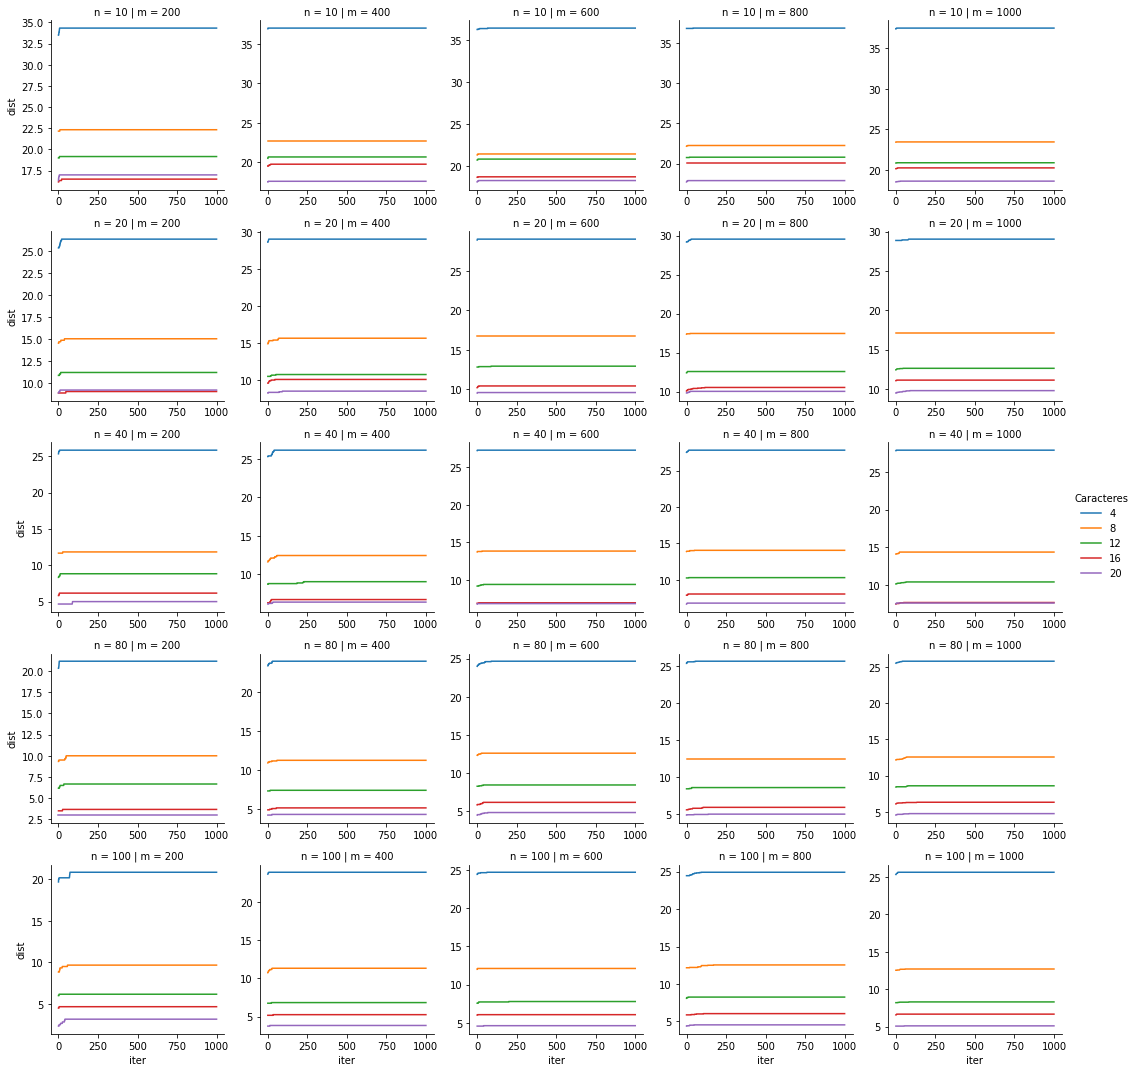

In [382]:
g = sns.FacetGrid(data, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.lineplot, x='iter', y='dist', hue='c', palette="tab10")
g.add_legend(title = "Caracteres")

In [358]:
#Se importan los datos de set 1 y se calculan los promedios de las similitudes
data = pd.read_csv("dataBusquedaLocal2.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()

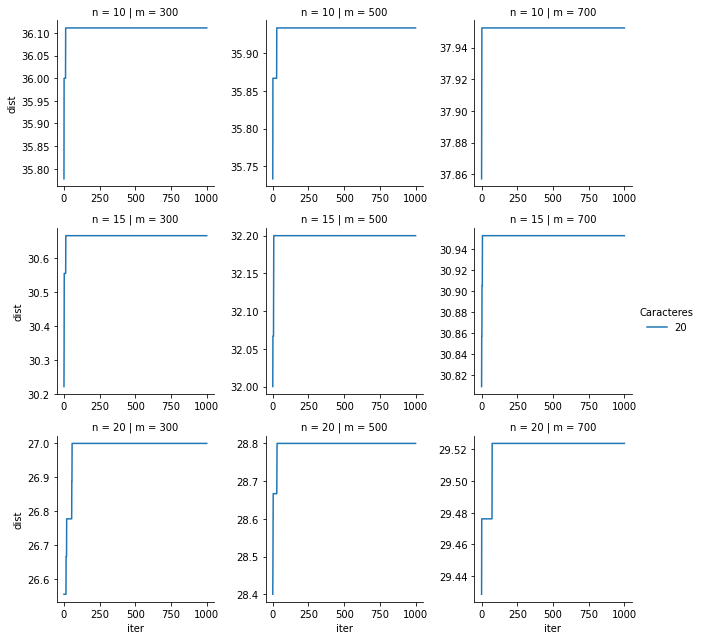

In [359]:
g = sns.FacetGrid(data, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.lineplot, x='iter', y='dist', hue='c', palette="tab10")
g.add_legend(title = "Caracteres")

A simple vista se puede observar que para todos los casos se requieren menos de 200 iteraciones para obtener un valor de similitud que converge.
Se realiza a continuacion una comparación entre los valores promedio para determinar cuantas iteraciones son necesarias para generar variaciones minimas.

In [362]:
data = pd.read_csv("dataBusquedaLocal1.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
df = pd.DataFrame(data)

# Inicializa una lista para almacenar las diferencias de promedio
diff_promedio = []

# Define el umbral para la diferencia de promedio
x = 0.1

# Agrupa por las combinaciones de 'n', 'm' y 'c'
grouped = df.groupby(['n', 'm', 'c'])

# Compara iteraciones consecutivas dentro de cada grupo
for nombre, grupo in grouped:
    iteraciones = grupo['iter'].unique()

    for i in range(len(iteraciones) - 1):
        iter1 = iteraciones[i]
        iter2 = iteraciones[i + 1]
        
        # Obtener los datos de las iteraciones
        values1 = grupo[grupo['iter'] == iter1]['dist']
        values2 = grupo[grupo['iter'] == iter2]['dist']
        
        # Calcular el promedio de distancias
        promedio1 = values1.mean()
        promedio2 = values2.mean()
        
        # Calcular la diferencia de promedio
        diff = abs(promedio2 - promedio1)
        
        # Guardar la diferencia de promedio si es mayor que x
        if diff > x:
            diff_promedio.append((nombre, iter1, iter2, diff))

difs = pd.DataFrame(diff_promedio, columns = ['nombre', 'iter1', 'iter2', 'diff'])


,nombre,iter1,iter2,diff
0,"(10, 200, 4)",1,2,0.166667
1,"(10, 200, 4)",2,3,0.166667
2,"(10, 200, 4)",4,5,0.166667
3,"(10, 200, 4)",5,6,0.166667
4,"(10, 200, 4)",6,7,0.166667
...,...,...,...,...
71,"(100, 200, 20)",12,13,0.166667
72,"(100, 200, 20)",24,25,0.166667
73,"(100, 200, 20)",37,38,0.166667
74,"(100, 200, 20)",40,41,0.166667


In [373]:
#Filtramos para obtener el indice máximo
difs.loc[difs['iter2'].idxmax()]

nombre    (40, 200, 20)
iter1                88
iter2                89
diff           0.166667
Name: 39, dtype: object

Para el caso del set 1 encontramos que con 89 iteraciones ya se alcanza al maximo de similitud.
Ahora calculamos con el data set 2

In [374]:
data = pd.read_csv("dataBusquedaLocal2.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
df = pd.DataFrame(data)

# Inicializa una lista para almacenar las diferencias de promedio
diff_promedio = []

# Define el umbral para la diferencia de promedio
x = 0.1

# Agrupa por las combinaciones de 'n', 'm' y 'c'
grouped = df.groupby(['n', 'm', 'c'])

# Compara iteraciones consecutivas dentro de cada grupo
for nombre, grupo in grouped:
    iteraciones = grupo['iter'].unique()

    for i in range(len(iteraciones) - 1):
        iter1 = iteraciones[i]
        iter2 = iteraciones[i + 1]
        
        # Obtener los datos de las iteraciones
        values1 = grupo[grupo['iter'] == iter1]['dist']
        values2 = grupo[grupo['iter'] == iter2]['dist']
        
        # Calcular el promedio de distancias
        promedio1 = values1.mean()
        promedio2 = values2.mean()
        
        # Calcular la diferencia de promedio
        diff = abs(promedio2 - promedio1)
        
        # Guardar la diferencia de promedio si es mayor que x
        if diff > x:
            diff_promedio.append((nombre, iter1, iter2, diff))

difs = pd.DataFrame(diff_promedio, columns = ['nombre', 'iter1', 'iter2', 'diff'])
difs

,nombre,iter1,iter2,diff
0,"(10, 300, 20)",0,1,0.222222
1,"(10, 300, 20)",11,12,0.111111
2,"(10, 500, 20)",0,1,0.133333
3,"(15, 300, 20)",0,1,0.111111
4,"(15, 300, 20)",1,2,0.222222
5,"(15, 300, 20)",12,13,0.111111
6,"(20, 300, 20)",14,15,0.111111
7,"(20, 300, 20)",18,19,0.111111
8,"(20, 300, 20)",54,55,0.111111
9,"(20, 300, 20)",56,57,0.111111


In [375]:
#Filtramos para obtener el indice máximo
difs.loc[difs['iter2'].idxmax()]

nombre    (20, 300, 20)
iter1                56
iter2                57
diff           0.111111
Name: 9, dtype: object

Para este caso observamos que con 57 iteraciones ya se alcanza al maximo de similitud.
Vamos a observar mas de cerca que sucede con los gráficos al achicar el rango de x

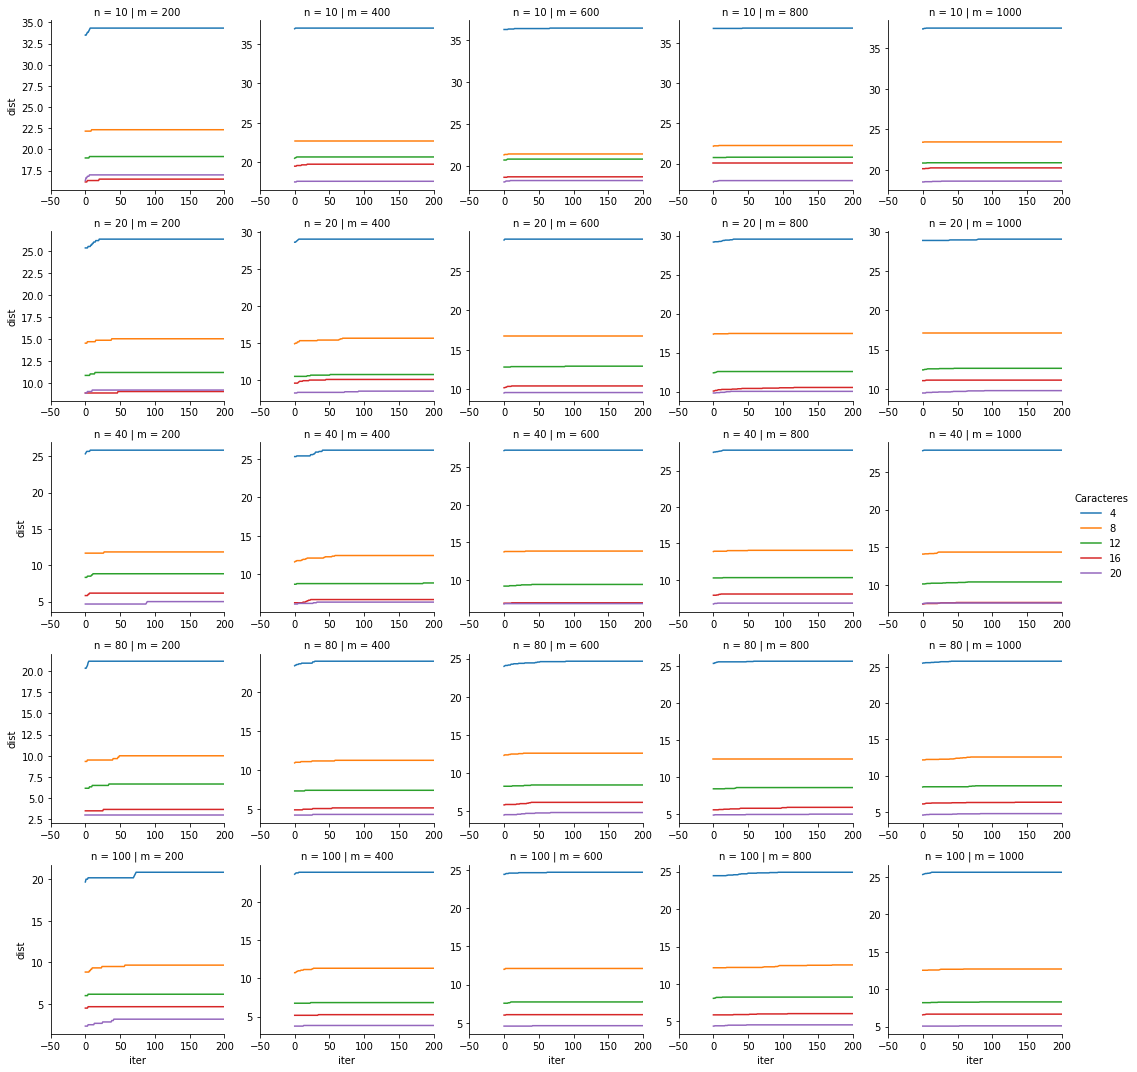

In [378]:
data = pd.read_csv("dataBusquedaLocal1.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
g = sns.FacetGrid(data, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.lineplot, x='iter', y='dist', hue='c', palette="tab10")
g.add_legend(title = "Caracteres")
g.set(xlim=(None, 200))

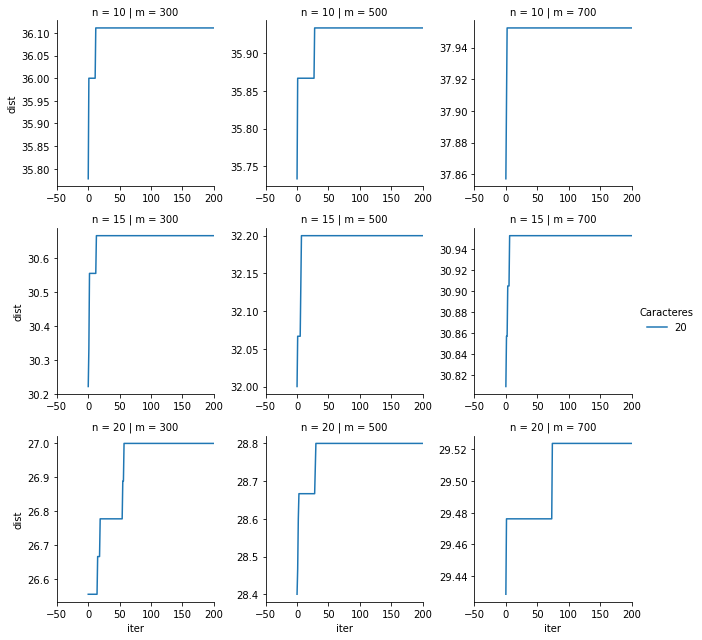

In [379]:
data = pd.read_csv("dataBusquedaLocal2.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
g = sns.FacetGrid(data, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.lineplot, x='iter', y='dist', hue='c', palette="tab10")
g.add_legend(title = "Caracteres")
g.set(xlim=(None, 200))


### CONCLUCIONES

Analizando los datos obtenidos, el efecto sobre las distancias o similitudes son similares a los observados con el algoritmo greedy. A medida que aumentan n, m y c la probabilidad de obtener una secuencia similar a las demas es menor.

De todas formas el algoritmo de busqueda local es capaz de mejorar las soluciones en alrededor de 100 iteraciones.

Se decide utilizar el numero de 100 iteraciones en base a los resultados experimentales, entre 60 y 90, adicionando algunas iteraciones como un seguro.

### SOLUCION FINAL

* Nombre: **busqueda_local**
* Acción: Encuentra una secuencia de caracteres con menor distancia de hamming que una solucion inicial (menor local).
* Input:
  * solucion: secuencia de m caracteres.
  * secuencias: una lista de n secuencias con m caracteres cada una.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * iteraciones (opcional): entero que indica la cantidad de iteraciones a realizar, 100 por default.
* Salida: una secuencia de caracteres.

In [ ]:
def busqueda_local(solucion, secuencias, m, n, iteraciones=100):#O(i*m*n) como i es una constante -> #0(n*m)

    # Solución inicial 
    mejor_solucion = solucion #O(1)

    # Almacena las distancias entre la solución inicial y las secuencias
    dist = calcular_distancias(secuencias,mejor_solucion) #O(n*m)

    # Almacena la mejor distancia inicial
    mejor_distancia = max(dist) #O(n)

    # Almacena un set de caracteres en la posición m de caracteres
    caracteres_distintos = set_caracteres(n,m,secuencias) #O(n*m)

    # Inicio de iterador para el corte
    iterador = 0 

    # Mientras no se llegue a la cantidad de iteraciones sigo iterador
    while iterador<iteraciones: #O(i*m+n)

        iterador += 1 #O(1)

        vecino, pos, nuevo_caracter = generar_vecino(mejor_solucion, m, caracteres_distintos) #O(m)      
                                    
        dist = actualizar_distancias(secuencias, dist, mejor_solucion[pos], nuevo_caracter, pos) #O(n)
                    
        nueva_distancia = max(dist) #O(n)
        
        
        #Si la nueva distancia es mejor lo reemplazo, caso contrario sigo con otro caracter
        if nueva_distancia < mejor_distancia: #O(1)
            mejor_solucion = vecino           #O(1)
            mejor_distancia = nueva_distancia #O(1)
            

    return mejor_solucion, mejor_distancia

## ALGORITMO GRASP

### SOLUCION INICIAL

* Nombre: **grasp**
* Acción: Encuentra una secuencia de caracteres con menor distancia de hamming a una lista de secuencias (menor global).
* Input:
  * secuencias: una lista de n secuencias con m caracteres cada una.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * iteraciones (opcional): entero que indica la cantidad de iteraciones a realizar.
* Salida: una secuencia de caracteres.

In [391]:
def grasp(secuencias, n, m, max_iter=100):

    # Inicio la mejor solución global y distancia como ninguna e infinito
    mejor_solucion_global = None
    mejor_distancia_global = float("inf")

    iterador = 0

    #Itero max_iter veces una busqueda local
    while iterador < max_iter:
        solucion_inicial = solucion_greedy(secuencias, n, m) #O(m*n)
        solucion_mejorada, distancia_solucion_mejorada = busqueda_local(solucion_inicial, secuencias, m,n) #O(m*n)

        #Si por cada vez que hago una busqueda local encuentro una mejor solución se retorna dicha solución
        if distancia_solucion_mejorada < mejor_distancia_global:
            mejor_solucion_global = solucion_mejorada
            mejor_distancia_global = distancia_solucion_mejorada

    return mejor_solucion_global, distancia_solucion_mejorada

### PRUEBAS

El objetivo del algoritomo *grasp* es encontrar la secuencia de caracteres mas parecida a una lista de secuencias. Esto lo logra realizando varias busquedas locales de diferentes soluciones greedy.
Teniendo en cuenta este objetivo, se plantea una prueba de comparación de distancias máximas obtenidas, entre una lista de secuencias y una solución greedy de dichas secuencias.

Al ser similar que busqueda_local se van a realizar las mismas pruebas. Eceptuando la variacion en c, ya que esta demostrado que al aumentar c las variaciones son menores, por lo que el peor caso es con un c pequeño.

En cada caso se evaluará la capacidad del algoritmo en generar soluciones cada vez mas similares a la lista de secuencias. Para dicho fin se realizara una evaluacion de la convergencia de la relación similitud vs iteraciones. Se elije como punto de corte aquel numero de iteraciones que no genere variaciones mayores al 0.5 %

Para la realización de las pruebas se modificó el algoritmo de *grasp* para que en cada iteracion guarde el iterador y la distancia encontrada

In [412]:
def grasp2(secuencias, n, m, max_iter=500):

    # Inicio la mejor solución global y distancia como ninguna e infinito
    mejor_solucion_global = None
    mejor_distancia_global = float("inf")

    iterador = 0

    res_iter = []
    res_dist = []

    #Itero max_iter veces una busqueda local
    while iterador < max_iter:

        solucion_inicial = solucion_greedy(secuencias, n, m) #O(m*n)
        solucion_mejorada, distancia_solucion_mejorada = busqueda_local(solucion_inicial, secuencias, m,n) #O(m*n)

        #Si por cada vez que hago una busqueda local encuentro una mejor solución se retorna dicha solución
        if distancia_solucion_mejorada < mejor_distancia_global:
            mejor_solucion_global = solucion_mejorada
            mejor_distancia_global = distancia_solucion_mejorada

        res_iter.append(iterador)
        res_dist.append(mejor_distancia_global)

        iterador += 1

    return res_iter, res_dist

#### Creación SET 1

In [432]:
data1 = pd.DataFrame()
caracteres="abcdefghijklmnopqrstuvwxyz"

# Por cada una de las variables a controlar 
for n in [10, 20, 40, 80, 100]:
  for m in [200, 400, 600, 800, 1000]:
    for c in [4]:

        # Creo 3 listas de secuencias independientes
        for i in range(3): #O(n*m+s2(n*m))
          secuencias = crear_secuencias_aleatorias(n, m, caracteres[:c]) #O(n*m)

          #Realizo grasp y almaceno los datos
          iterador, dist = grasp2(secuencias, n, m, 1000)
          df = pd.DataFrame()
          df['iter'] = iterador
          df['dist'] = dist
          df['n'] = n
          df['m'] = m
          df['c'] = c

          data1 = pd.concat([data1,df], ignore_index=True)
            
data1.to_csv("dataGrasp1.csv")

#### Creación SET 2

In [417]:
data2 = pd.DataFrame()

for n in [10, 15, 20]:
  for m in [300, 500, 700]:
        
        #importo los archivos
        for i in range(1,4,1): #O(n*m+s2(n*m))
          path = './instancias/texto_mas_parecido_'+str(n)+'_'+str(m)+'_'+str(i)+'.txt'
          with open(path, 'r', encoding='utf-8') as file:
            secuencias = file.readlines()

          #Realizo grasp y almaceno los datos
          iterador, dist = grasp2(secuencias, n, m,1000)
          df = pd.DataFrame()
          df['iter'] = iterador
          df['dist'] = dist
          df['n'] = n
          df['m'] = m
          df['c'] = c
          data2 = pd.concat([data2,df], ignore_index=True)
            
data2.to_csv("dataGrasp2.csv")

#### Analisis

Una vez generados / importados los set de datos, se realiza una inepeccion inicial viendo como se comporta las similitudes máximas calculadas con respecto a las variables establecidas (n,m).
Para tal fin se realiza una grilla con graficos de linea, en donde las columnas representan la variación de m, las filas la variación de n, el eje x las iteraciones, el eje y las similitudes máximas

In [436]:
#Se importan los datos de set 1 y se calculan los promedios de las similitudes
data = pd.read_csv("dataGrasp1.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
data = data.rename(columns={'dist':'sim%'})

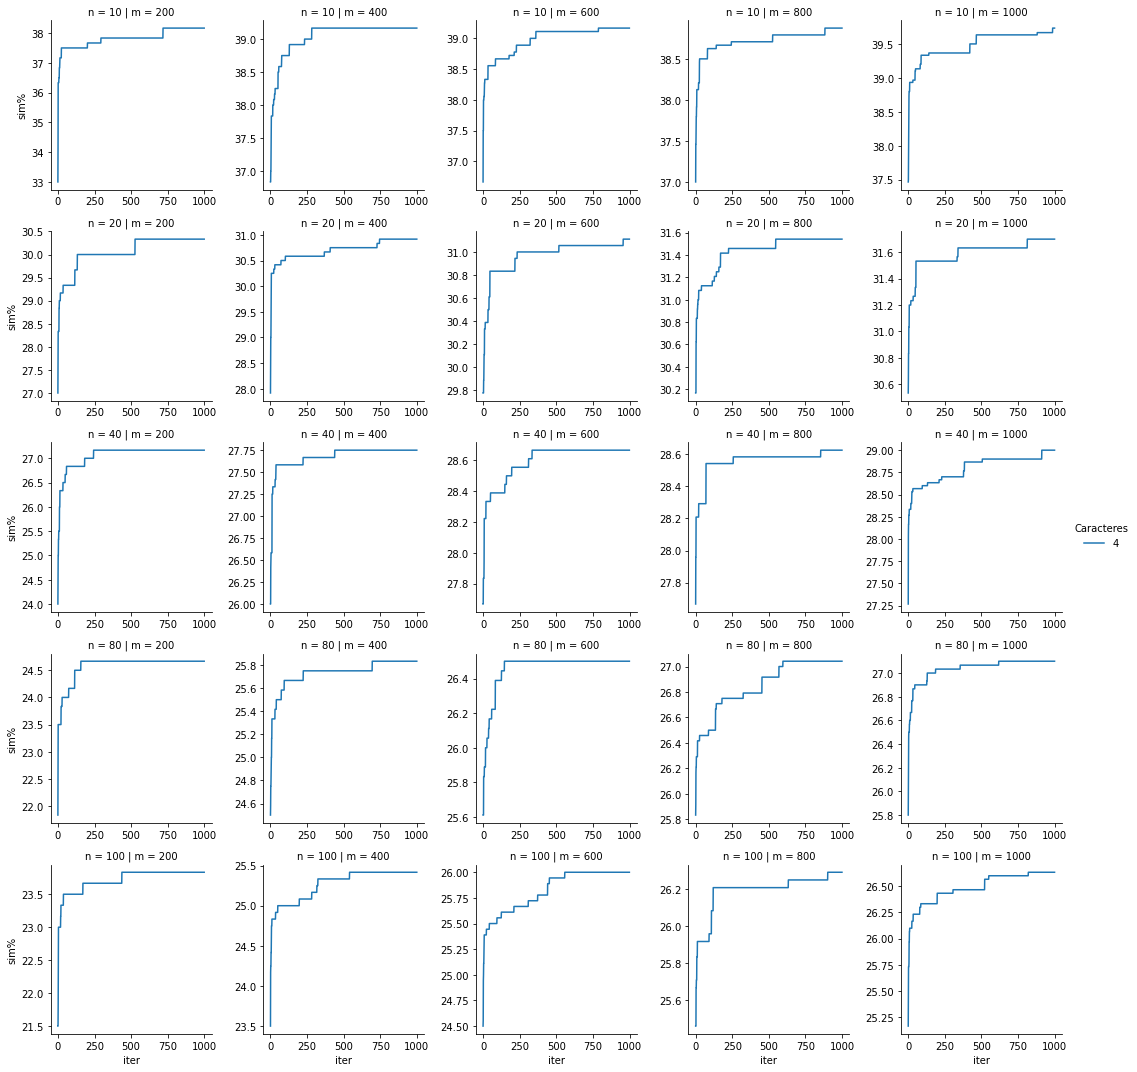

In [437]:
g = sns.FacetGrid(data, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.lineplot, x='iter', y='sim%', hue='c', palette="tab10")
g.add_legend(title = "Caracteres")

In [438]:
#Se importan los datos de set 1 y se calculan los promedios de las similitudes
data = pd.read_csv("dataGrasp2.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
data = data.rename(columns={'dist':'sim%'})

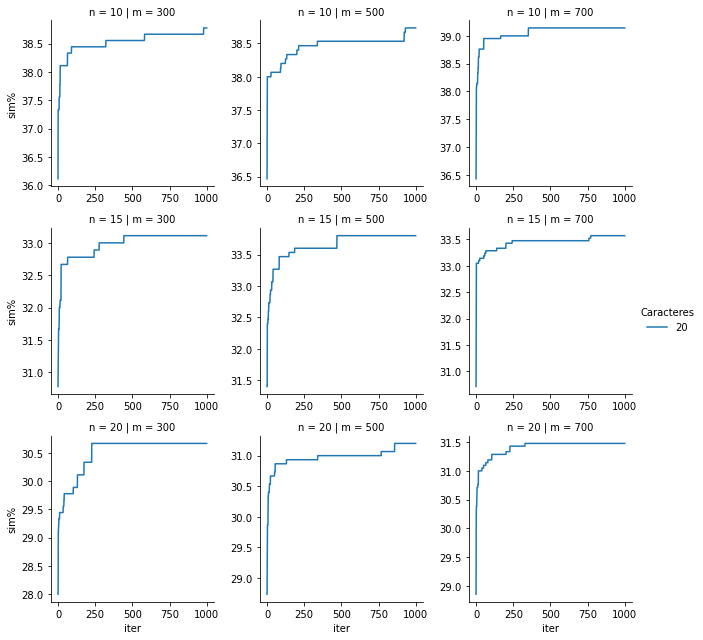

In [439]:
g = sns.FacetGrid(data, col="m", row="n",  sharey =False ,sharex=False)
g.map_dataframe(sns.lineplot, x='iter', y='sim%', hue='c', palette="tab10")
g.add_legend(title = "Caracteres")

A continuacion se determina en que valor de iteraciones no se generan aumentos mayores al 0.5 %

In [440]:
data = pd.read_csv("dataGrasp1.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
df = pd.DataFrame(data)

# Inicializa una lista para almacenar las diferencias de promedio
diff_promedio = []

# Define el umbral para la diferencia de promedio
x = 0.5

# Agrupa por las combinaciones de 'n', 'm' y 'c'
grouped = df.groupby(['n', 'm', 'c'])

# Compara iteraciones consecutivas dentro de cada grupo
for nombre, grupo in grouped:
    iteraciones = grupo['iter'].unique()

    for i in range(len(iteraciones) - 1):
        iter1 = iteraciones[i]
        iter2 = iteraciones[i + 1]
        
        # Obtener los datos de las iteraciones
        values1 = grupo[grupo['iter'] == iter1]['dist']
        values2 = grupo[grupo['iter'] == iter2]['dist']
        
        # Calcular el promedio de distancias
        promedio1 = values1.mean()
        promedio2 = values2.mean()
        
        # Calcular la diferencia de promedio
        diff = abs(promedio2 - promedio1)
        
        # Guardar la diferencia de promedio si es mayor que x
        if diff > x:
            diff_promedio.append((nombre, iter1, iter2, diff))

difs = pd.DataFrame(diff_promedio, columns = ['nombre', 'iter1', 'iter2', 'diff'])

In [441]:
#Filtramos para obtener el indice máximo
difs.loc[difs['iter2'].idxmax()]

nombre    (40, 400, 4)
iter1               10
iter2               11
diff          0.666667
Name: 6, dtype: object

In [456]:
data = pd.read_csv("dataGrasp2.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
df = pd.DataFrame(data)

# Inicializa una lista para almacenar las diferencias de promedio
diff_promedio = []

# Define el umbral para la diferencia de promedio
x = 0.5

# Agrupa por las combinaciones de 'n', 'm' y 'c'
grouped = df.groupby(['n', 'm', 'c'])

# Compara iteraciones consecutivas dentro de cada grupo
for nombre, grupo in grouped:
    iteraciones = grupo['iter'].unique()

    for i in range(len(iteraciones) - 1):
        iter1 = iteraciones[i]
        iter2 = iteraciones[i + 1]
        
        # Obtener los datos de las iteraciones
        values1 = grupo[grupo['iter'] == iter1]['dist']
        values2 = grupo[grupo['iter'] == iter2]['dist']
        
        # Calcular el promedio de distancias
        promedio1 = values1.mean()
        promedio2 = values2.mean()
        
        # Calcular la diferencia de promedio
        diff = abs(promedio2 - promedio1)
        
        # Guardar la diferencia de promedio si es mayor que x
        if diff > x:
            diff_promedio.append((nombre, iter1, iter2, diff))

difs = pd.DataFrame(diff_promedio, columns = ['nombre', 'iter1', 'iter2', 'diff'])


In [443]:
#Filtramos para obtener el indice máximo
difs.loc[difs['iter2'].idxmax()]

nombre    (15, 300, 20)
iter1                20
iter2                21
diff           0.555556
Name: 4, dtype: object

A continuacion se determina cuanto es la ganancia, entre los numero de iteraciones determinados para obtener ganancias mayores al 0,5 % y los ultimos valores obtenidos.

In [454]:
data = pd.read_csv("dataGrasp1.csv")
data['dist'] = 100-(data['dist']*100/data['m'])
data = data.groupby(['iter', 'n', 'm', 'c'], as_index=False)['dist'].mean()
df = pd.DataFrame(data)

# Inicializa una lista para almacenar las diferencias de promedio
diff_promedio = []

# Agrupa por las combinaciones de 'n', 'm' y 'c'
grouped = df.groupby(['n', 'm', 'c'])

# Compara iteraciones consecutivas dentro de cada grupo
for nombre, grupo in grouped:

    values1 = grupo[grupo['iter'] == 50]['dist']
    values2 = grupo[grupo['iter'] == 999]['dist']
        
    # Calcular el promedio de distancias
    promedio1 = values1.mean()
    promedio2 = values2.mean()
        
    # Calcular la diferencia de promedio
    diff = abs(promedio2 - promedio1)
        
    # Guardar la diferencia de promedio si es mayor que x
    diff_promedio.append((nombre, diff))

difs = pd.DataFrame(diff_promedio, columns = ['nombre', 'diff'])
difs.describe()

,diff
count,25.000000
mean,0.465556
std,0.198488
min,0.166667
25%,0.333333
50%,0.416667
75%,0.583333
max,1.000000


### CONCLUCIONES

Analizando los datos obtenidos, el efecto sobre las distancias o similitudes son similares a los observados con el algoritmo greedy y busqueda local. A medida que aumentan n, m y c la probabilidad de obtener una secuencia similar a las demas es menor.

De todas formas el algoritmo de grasp es capaz de mejorar las soluciones en alrededor de 20 iteraciones.

Se decide utilizar el numero de 50 iteraciones en base a los resultados experimentales, entre 10 y 20, adicionando algunas iteraciones como un seguro.

Si bien graficamente se observa que hasta 1000 iteraciones se puede seguir mejorando la similitud, se tienen que hacer 950 iteraciones adicionales para ganar una similitud para ganar en promedio un 0.5 % de similitud. Es un costo muy alto para un % muy bajo.

### SOLUCION FINAL

* Nombre: **grasp**
* Acción: Encuentra una secuencia de caracteres con menor distancia de hamming a una lista de secuencias (menor global).
* Input:
  * secuencias: una lista de n secuencias con m caracteres cada una.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * iteraciones (opcional): entero que indica la cantidad de iteraciones a realizar.
* Salida: una secuencia de caracteres.

In [ ]:
def grasp(secuencias, n, m, max_iter=50):#O(m*n)

    # Inicio la mejor solución global y distancia como ninguna e infinito
    mejor_solucion_global = None
    mejor_distancia_global = float("inf")

    iterador = 0

    #Itero max_iter veces una busqueda local
    while iterador < max_iter:
        solucion_inicial = solucion_greedy(secuencias, n, m) #O(m*n)
        solucion_mejorada, distancia_solucion_mejorada = busqueda_local(solucion_inicial, secuencias, m, n) #O(m*n)

        #Si por cada vez que hago una busqueda local encuentro una mejor solución se retorna dicha solución
        if distancia_solucion_mejorada < mejor_distancia_global:
            mejor_solucion_global = solucion_mejorada
            mejor_distancia_global = distancia_solucion_mejorada

    return mejor_solucion_global, distancia_solucion_mejorada

## Funciones adicionales

### Funciones de Distancia


#### distancia_hamming

Distancia de Hamming: Es la cantidad de caracteres diferentes en cada posición
* Nombre: **distancia_hamming**
* Acción: Calcula la distancia de Hamming de dos secuencias de caracteres.
* Input:
  * sec1: string de m caracteres.
  * sec2: string de m caracteres.
* Salida: Un entero.

In [2]:
def distancia_hamming(sec1, sec2):#O(m) donde m es la longitud de secX
    return sum(caracter1 != caracter2 for caracter1, caracter2 in zip(sec1, sec2))

#### calcular_distancias

* Nombre: **calcular_distancias**
* Acción: Calcula las distancias de hamming de una secuencia sc con rescpecto a una lista de secuencias.
* Input:
  * secuencias: lista con n secuencias de m caracteres.
  * sc: secuencia de m caracteres
* Salida: una lista de enteros

In [3]:
def calcular_distancias(secuencias, sc): #O(n*m)
  return [distancia_hamming(secuencia, sc) for secuencia in secuencias]

#### actualizar_distancias

* Nombre: **actualizar_distancias**
* Acción: Actualiza las distancias de hamming, de una secuencia sc con rescpecto a una posicion específica de m de una lista de secuencias de m caracteres.
* Input:
  * secuencias: lista con n secuencias de m caracteres.
  * distancias: lista de distancias de hamming a actualizar
  * caracter_anterior: caracter de la secuencia anterior en la posición a evaluar
  * caracter_nuevo: caracter de la secuencia nueva en la posición a evaluar
  * posicion: posición a evaluar
* Salida: una lista de enteros

In [4]:
def actualizar_distancias(secuencias, distancias, caracter_anterior, caracter_nuevo, posicion): #O(n)

  n = len(secuencias)                           #O(1)
  # Por cada secuencia si el caracter de la posicion a evaluar es igual al caracter nuevo,
  # resto uno a la distancia de dicha secuencia, si el caracter es igual al caracter anterior sumo 1.
  # Si no sucede nada de lo anterior no se altera la distancia.
  for sec in range(n):                          #O(n)

    if secuencias[sec][posicion] == caracter_nuevo:
      distancias[sec] -= 1                 #O(1)

    if secuencias[sec][posicion] == caracter_anterior:
      distancias[sec] += 1                 #O(1)

  return distancias

### Funciones de Frecuencias

#### calcular_frecuencias_relativas

* Nombre: **calcular_frecuencias_relativas**
* Acción: Calcula las frecuencias relativas de los caracteres en una posición m, entre todas las secuencias
* Input:
  * secuencias: lista con n secuencias de m caracteres.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica la posición m a evaluar.
* Salida: Diccionario (Key = caracter, Value = frecuencia)


In [6]:
def calcular_frecuencias_relativas(secuencias, n, m): #O(n)

  frecuencias = {}

  # Para cada secuencia en secuencias, si el caracter m de la secuencia esta en el diccionario
  # suma 1/n la frecuencia relativa caso contrario lo inicia en 1/n
  for secuencia in secuencias:          #O(n)
    caracter = secuencia[m]             #O(1)
    if caracter in frecuencias:         #O(1)
      frecuencias[caracter] = round(frecuencias[caracter] + 1/n,3)      #O(1) Nota: Se utiliza el redondeo ya que al sumar fracciones
    else:                                                               # python suma los errores y es significativo si no se redondea
      frecuencias[caracter] = 1/n       #O(1)

  return frecuencias

#### frecuencias_relativas

* Nombre: **frecuencias_relativas**
* Acción:
  1. Calcula las frecuencias relativas de los caracteres en cada posición m, entre todas las secuencias
  2. Calcula los caracteres mas frecuentes en cada posición m, de entre todas las secuencias (FR >= 1/c).
  3. Calcula los caracteres menos frecuentes en cada posición m, de entre todas las secuencias (FR < 1/c).
* Input:
  * secuencias: lista con n secuencias de m caracteres.
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
* Salida:
  1. frecuencias: Lista de m diccionarios (caracter, frecuencia)
  2. max_frec: Lista de m listas de caracteres
  3. min_frec: Lista de m listas de caracteres

  *Nota: Se decide utilizar como punto de corte 1/c ya que es la frecuencia de un caracter en el peor caso, en donde todos los caracteres tienen la misma frecuencia y no hay predominancia de unos sobre otros.*

In [7]:
def frecuencias_relativas(secuencias, n, m):#O(n*m)

  # Lista que contiene todos los diccionarios de frecuencias relativas de cada m
  frecuencias = []                  #O(1)

  # Lista que contiene todos los caracteres mas frecuentes de cada m
  max_frec = [[] for _ in range(m)] #O(m)

  # Lista que contiene todos los caracteres menos frecuentes de cada m
  min_frec = [[] for _ in range(m)] #O(m)

  # Por cada caracter m en en total de caracteres.

  for char in range(m):             #O(m*n)
                                    # Nota: el procedimiento es O(m*(n+c)), como por lo general n>c entonces queda O(m*n)
                                    # en el caso de que n<c -> f.items tine como maximo longitud n por lo que n+c = 2n -> O(m*2n) -> O(m*n)

    # calculo sus frecuencias relativas y lo almaceno
    f = calcular_frecuencias_relativas(secuencias, n, char) #O(n)
    frecuencias.append(f)           #O(1)

    # Por cada frecuencia relativa calculada obtiene sus caracteres mas y menos frecuentes
    c = len(f)                      #O(1)
    for k,v in f.items():           #O(c)
      if v >= 1/c:
        max_frec[char].append(k)    #O(1)
      elif v < 1/c:
        min_frec[char].append(k)    #O(1)

  return frecuencias, max_frec, min_frec

#### elegirRand

* Nombre: **elegirRand**
* Acción: Elije un elemento de una lista de forma aleatoria. Si la lista se encuenta vacía retorna un valor por default.
* Input:
  * lista: lista de elementos
  * default: elemento por default a elegir
* Salida: elemento

In [8]:
def elegirRand(lista, default=None): #O(1)
  if len(lista)>0:
    return rd.choice(lista) #O(1)
  return default

### Crear Secuencias Aleatorias

* Nombre: **crear_secuencias_aleatorias**
* Acción: Construye una lista de n secuencias con m caracteres aleatorios a elección
* Input:
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * caracteres_posibles: string o lista con caracteres posibles a seleccionar.
* Salida: una lista con n secuencias de m caracteres.

In [9]:
def crear_secuencias_aleatorias(n, m, caracteres_posibles):

  secuencia = 0
  secuencias = []

  #Mientras no se alcance la cantidad de secuencias, estas se generan y se almacenan
  while secuencia < n:
    caracteres = 0
    resp_texto = ""

    #Mientras no se alcance la cantidad de caracteres
    while caracteres < m:

      #Se elije un caracter aleatorio dentro de los posibles
      caracter_aleatorio = rd.choice(caracteres_posibles)

      #Se agrega el caracter la secuencia
      resp_texto += caracter_aleatorio

      #Se aumentael contador de caracteres
      caracteres += 1

    #una vez terminada la secuencia, se almacena y se aumenta el contador de cantidad de secuencias
    secuencias.append(resp_texto)
    secuencia += 1

  return secuencias


### Set Caracteres

* Nombre: **set_caracteres**
* Acción: Construye una lista de m sets de los caracteres de la posición m de las listas de secuencias
* Input:
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * secuencias: una lista de n secuencias con m caracteres cada uno.
* Salida: una lista con m sets.

In [10]:
def set_caracteres(n, m, secuencias):#O(m*n)

    sets = [] #O(1)
    
    for pos in range(m): #O(m*n)

        caracteres = [] #O(1)

        for sec in range(n): #O(n)
            caracteres.append(secuencias[sec][pos]) #O(1)

        sets.append(set(caracteres)) #O(n)

    return sets

### Generar Vecino

* Nombre: **generar_vecino**
* Acción: 
* Input:
  * n: entero que indica el numero de secuencias en la lista.
  * m: entero que indica el numero de caracteres de las secuencias.
  * secuencias: una lista de n secuencias con m caracteres cada uno.
* Salida: una lista con m sets.

In [72]:
def generar_vecino(secuencia, m, caracteres_posibles): #como c<<m -> O(m)
    
    pos = rd.randint(0,m-1) #O(1)
    caracteres_posibles = list(caracteres_posibles[pos]) #O(c)
    caracteres_posibles.remove(secuencia[pos]) #O(1)
    nuevo_caracter = rd.choice(caracteres_posibles) #O(c)
    vecino = (secuencia[:pos] + nuevo_caracter + secuencia[pos + 1 :]) #O(m)

    return vecino, pos, nuevo_caracter